In [5]:
import matplotlib.pyplot as plt    #引入函式庫
import matplotlib.patches as patches

In [6]:
import numpy as np

In [7]:
dark_red = (192/255,80/255,77/255,1)
yolk = (253/255,186/255,33/255,1)
bar_blue = (79/255,129/255,189/255,1)
arg_blue = (116/255,172/255,223/255,1)
arg_yellow = (246/255,180/255,14/255,1)

In [8]:
algo = ['LR', 'kNN', 'SVM', 'RF', 'XGB', 'NN1', 'NN5']

# Figure 5: POWER with error bar
## Power here refers to the mean rather than median!

In [11]:
def figure_5(auc, 
             power,
             auc_low,
             power_low,
             color = bar_blue,
             position = [(0,5),(0,5),(0,5),(0,5),(0,5),(0,5),(0,5)], 
             alignment = ['left','left','left','left','left','left','left',],
             color_dash = (0/255,101/255,92/255,1),
             label = None,
             filename = None):
    
#     plt.subplot() # for the rectangle       
    
    plt.figure( figsize=(5,5), dpi=350 )
    plt.scatter(auc, power, label=label, c = color)   #繪製散佈圖
    
    auc_avg = sum(auc)/len(auc)
    auc_var = sum([((x - auc_avg) ** 2) for x in auc]) / (len(auc)-1)
    auc_std = auc_var ** 0.5
    plt.axvline(x = auc_avg, linestyle='--', color = color_dash, linewidth= 1)


    
    power_avg = sum(power)/len(power)
    plt.axhline(y = power_avg, linestyle='--', color = color_dash, linewidth= 1)
    power_var = sum([((x - power_avg) ** 2) for x in power]) / (len(power)-1)
    power_std = power_var ** 0.5

    
#     plt.xticks(list(range(70,100,5)))
    
    axes = plt.gca()
#     !!!here to change x_limit!!!
    x_lower_limit = auc_avg-2.0*auc_std
    if x_lower_limit >= 0:
        axes.set_xlim([x_lower_limit, 2*auc_avg - x_lower_limit])
    else:
        axes.set_xlim([0,auc_avg*2])

# #   MRSA power specific
#     axes.set_ylim([8,power_avg*2 -8])
#     axes.invert_yaxis() #旋轉y軸   

#   TRI power specific
    axes.set_ylim([power_avg*2 -13, 13])
    axes.invert_yaxis() #旋轉y軸       
    

    x_min, x_max = plt.xlim()
    y_min, y_max = plt.ylim()
    axes.text(auc_avg, y_max+(y_max-y_min)*0.02, f'Mean AUROC\n({round(auc_avg,1)}%)', horizontalalignment='center', c = color_dash)
    axes.text(x_max+(x_max-x_min)*0.07, power_avg,  f'Average power consumption\nof 7 algorithms\n({round(power_avg,1)}W)', rotation=-90,verticalalignment='center', horizontalalignment='center', c = color_dash)
    
    
#     plt.text(auc_avg, y_max-0.1, f'Mean AUC:{auc_avg}', ha = 'center')
#     plt.text(x_max+0.1, power_avg, f'Mean power:{round(power_avg,1)}', rotation = -90, ha = 'center')



    for i in range(len(auc)):  #把每個點標上演算法。
#         rect = patches.Rectangle( (auc_low[i],power_low[i]) , 2*(auc[i]-auc_low[i]), 2*(power[i]-power_low[i]),linewidth=1,edgecolor='r',facecolor='none')
        rect = patches.Rectangle( (auc_low[i],power_low[i]) , 2*(auc[i]-auc_low[i]), 2*(power[i]-power_low[i]), facecolor='black', alpha = 0.1) #樣式2
        axes.add_patch(rect)



    for i in range(len(auc)):  #把每個點標上演算法。
        # this method is called for each point
        plt.annotate(algo[i], #the text
                     (auc[i], power[i]), # the point
                     textcoords="offset points", # how to position the text
                     xytext=position[i], # distance from text to points (x,y)
                     ha=alignment[i]) # text的對齊方式: left, right or center
    
    

    

    
    
    plt.xlabel("AUROC(%)")
    plt.ylabel("Mean power consumption(W)") 
    if label != None:
        plt.legend(loc = 'upper left')  #把圖例box加入圖表，參數loc代表box的位置
#     plt.show()
    
    if filename != None:
        plt.savefig(filename, dpi=300)
    
    


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


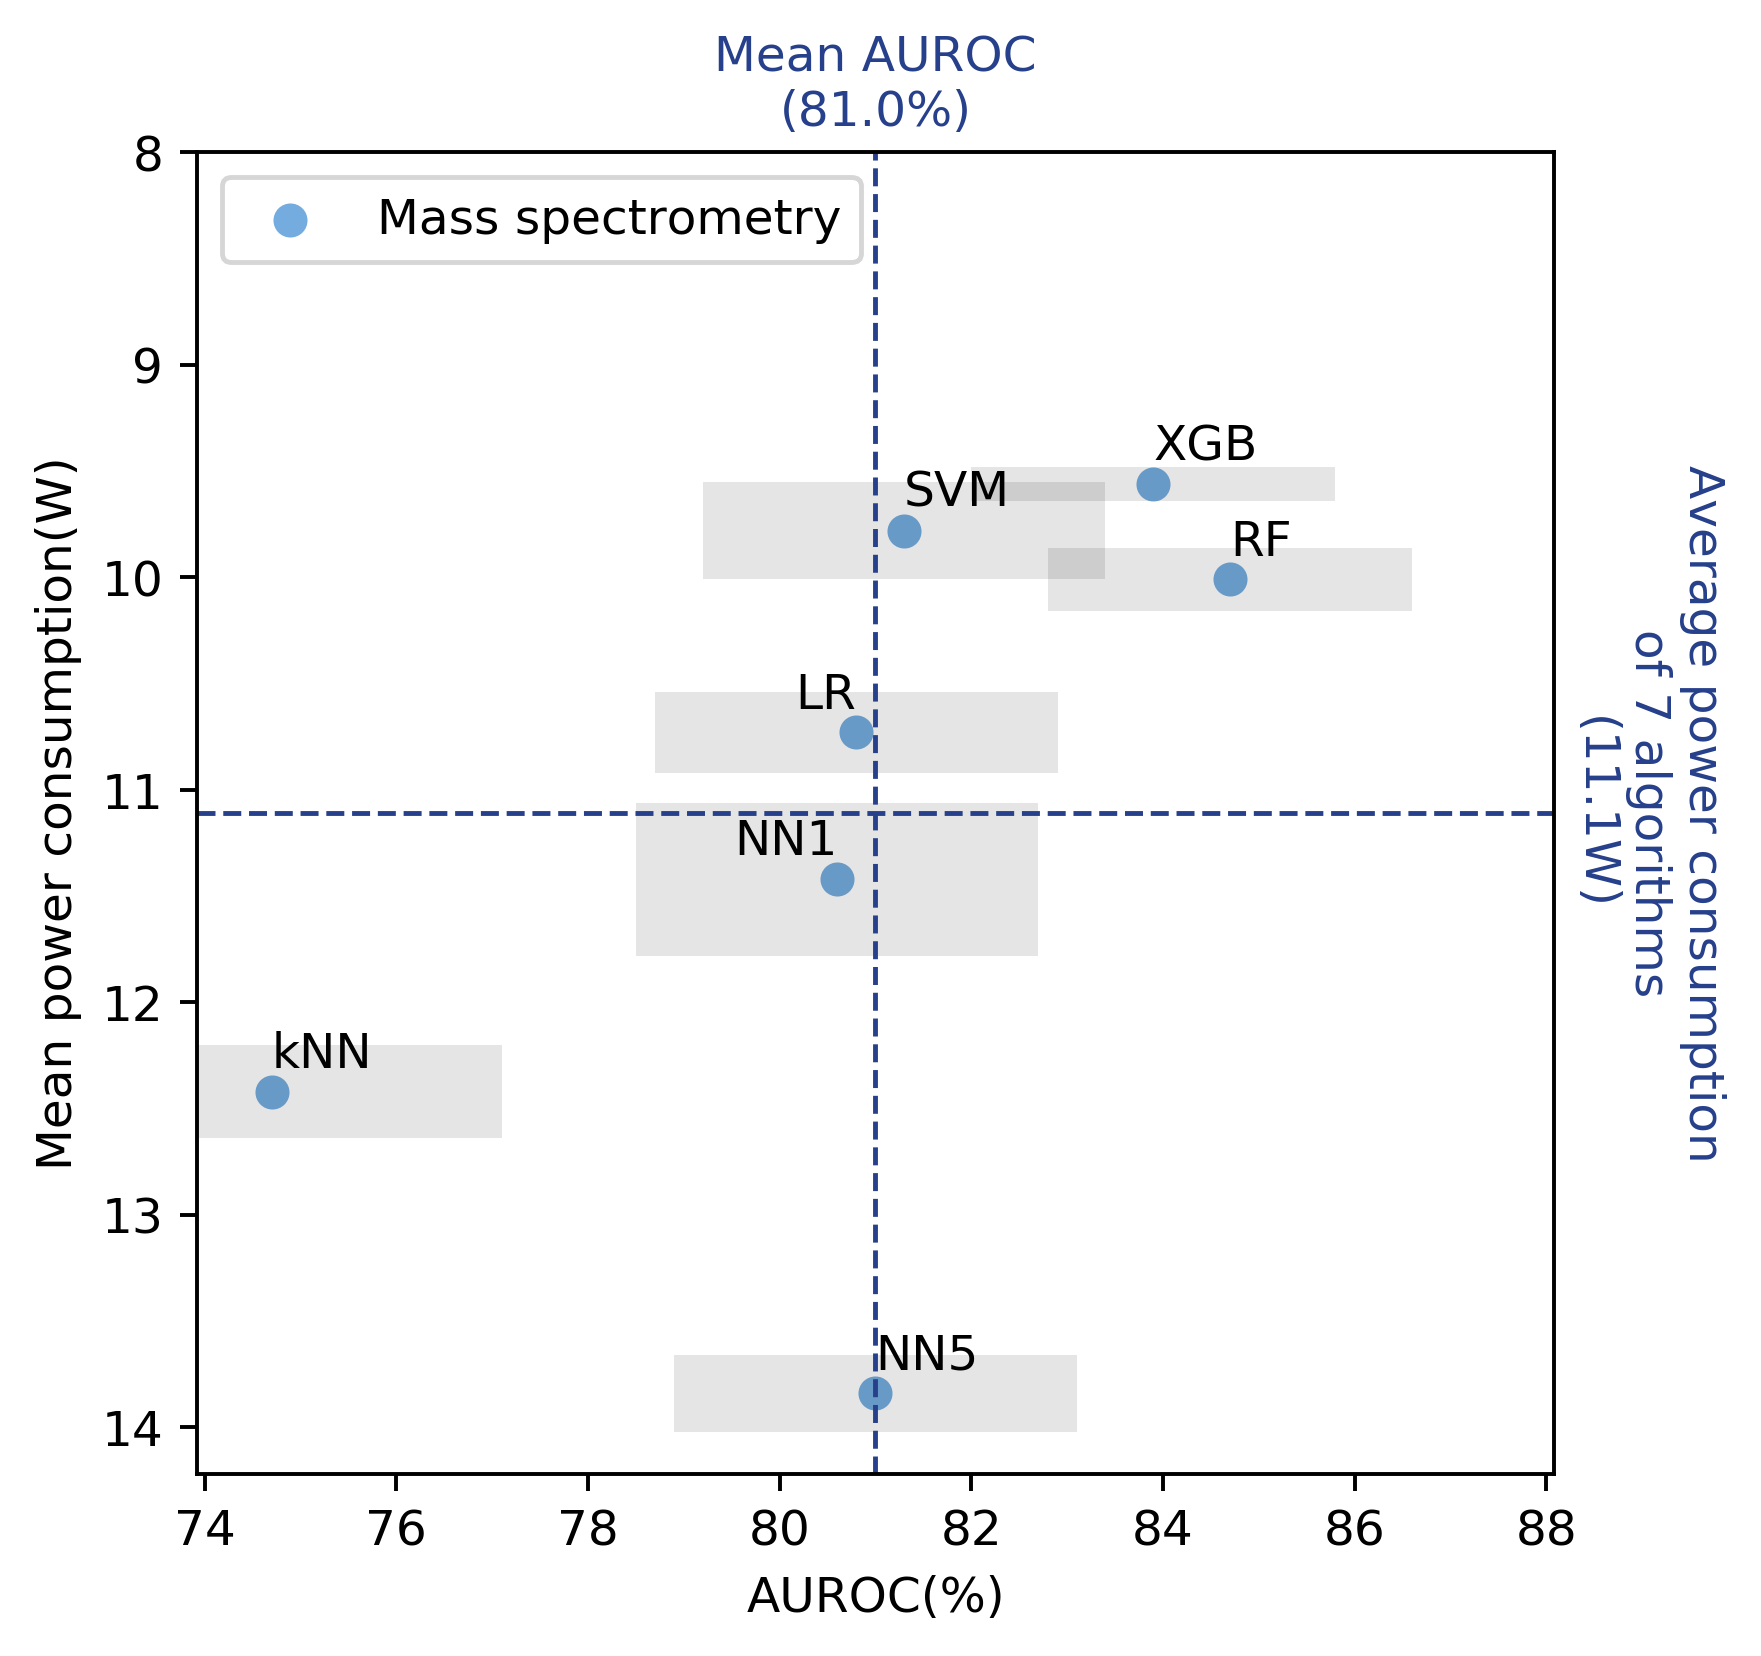

In [10]:
AUC_MRSA =     [80.8, 74.7, 81.3, 84.7, 83.9, 80.6, 81.0]
AUC_MRSA_low = [78.7, 72.3, 79.2, 82.8, 82.0, 78.5, 78.9]
power_MRSA =     [10.73, 12.42, 9.78, 10.01, 9.56, 11.42, 13.84]
power_MRSA_low = [10.54, 12.20, 9.55, 9.86, 9.48, 11.06, 13.66]
position_MRSA = [(0,5),(0,5),(0,5),(0,5),(0,5),(0,5),(0,5)]
alignment_MRSA = ['right','left','left','left','left','right','left',]

# x_limit: 2.2*AUC
# y_limit: lower limit 8

figure_5(AUC_MRSA, 
         power_MRSA, 
         AUC_MRSA_low,
         power_MRSA_low,
         color = arg_blue,
         alignment = alignment_MRSA,
         label = 'Mass spectrometry',
         color_dash = (38/255,64/255,139/255),
         filename = 'figure5a.png')

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


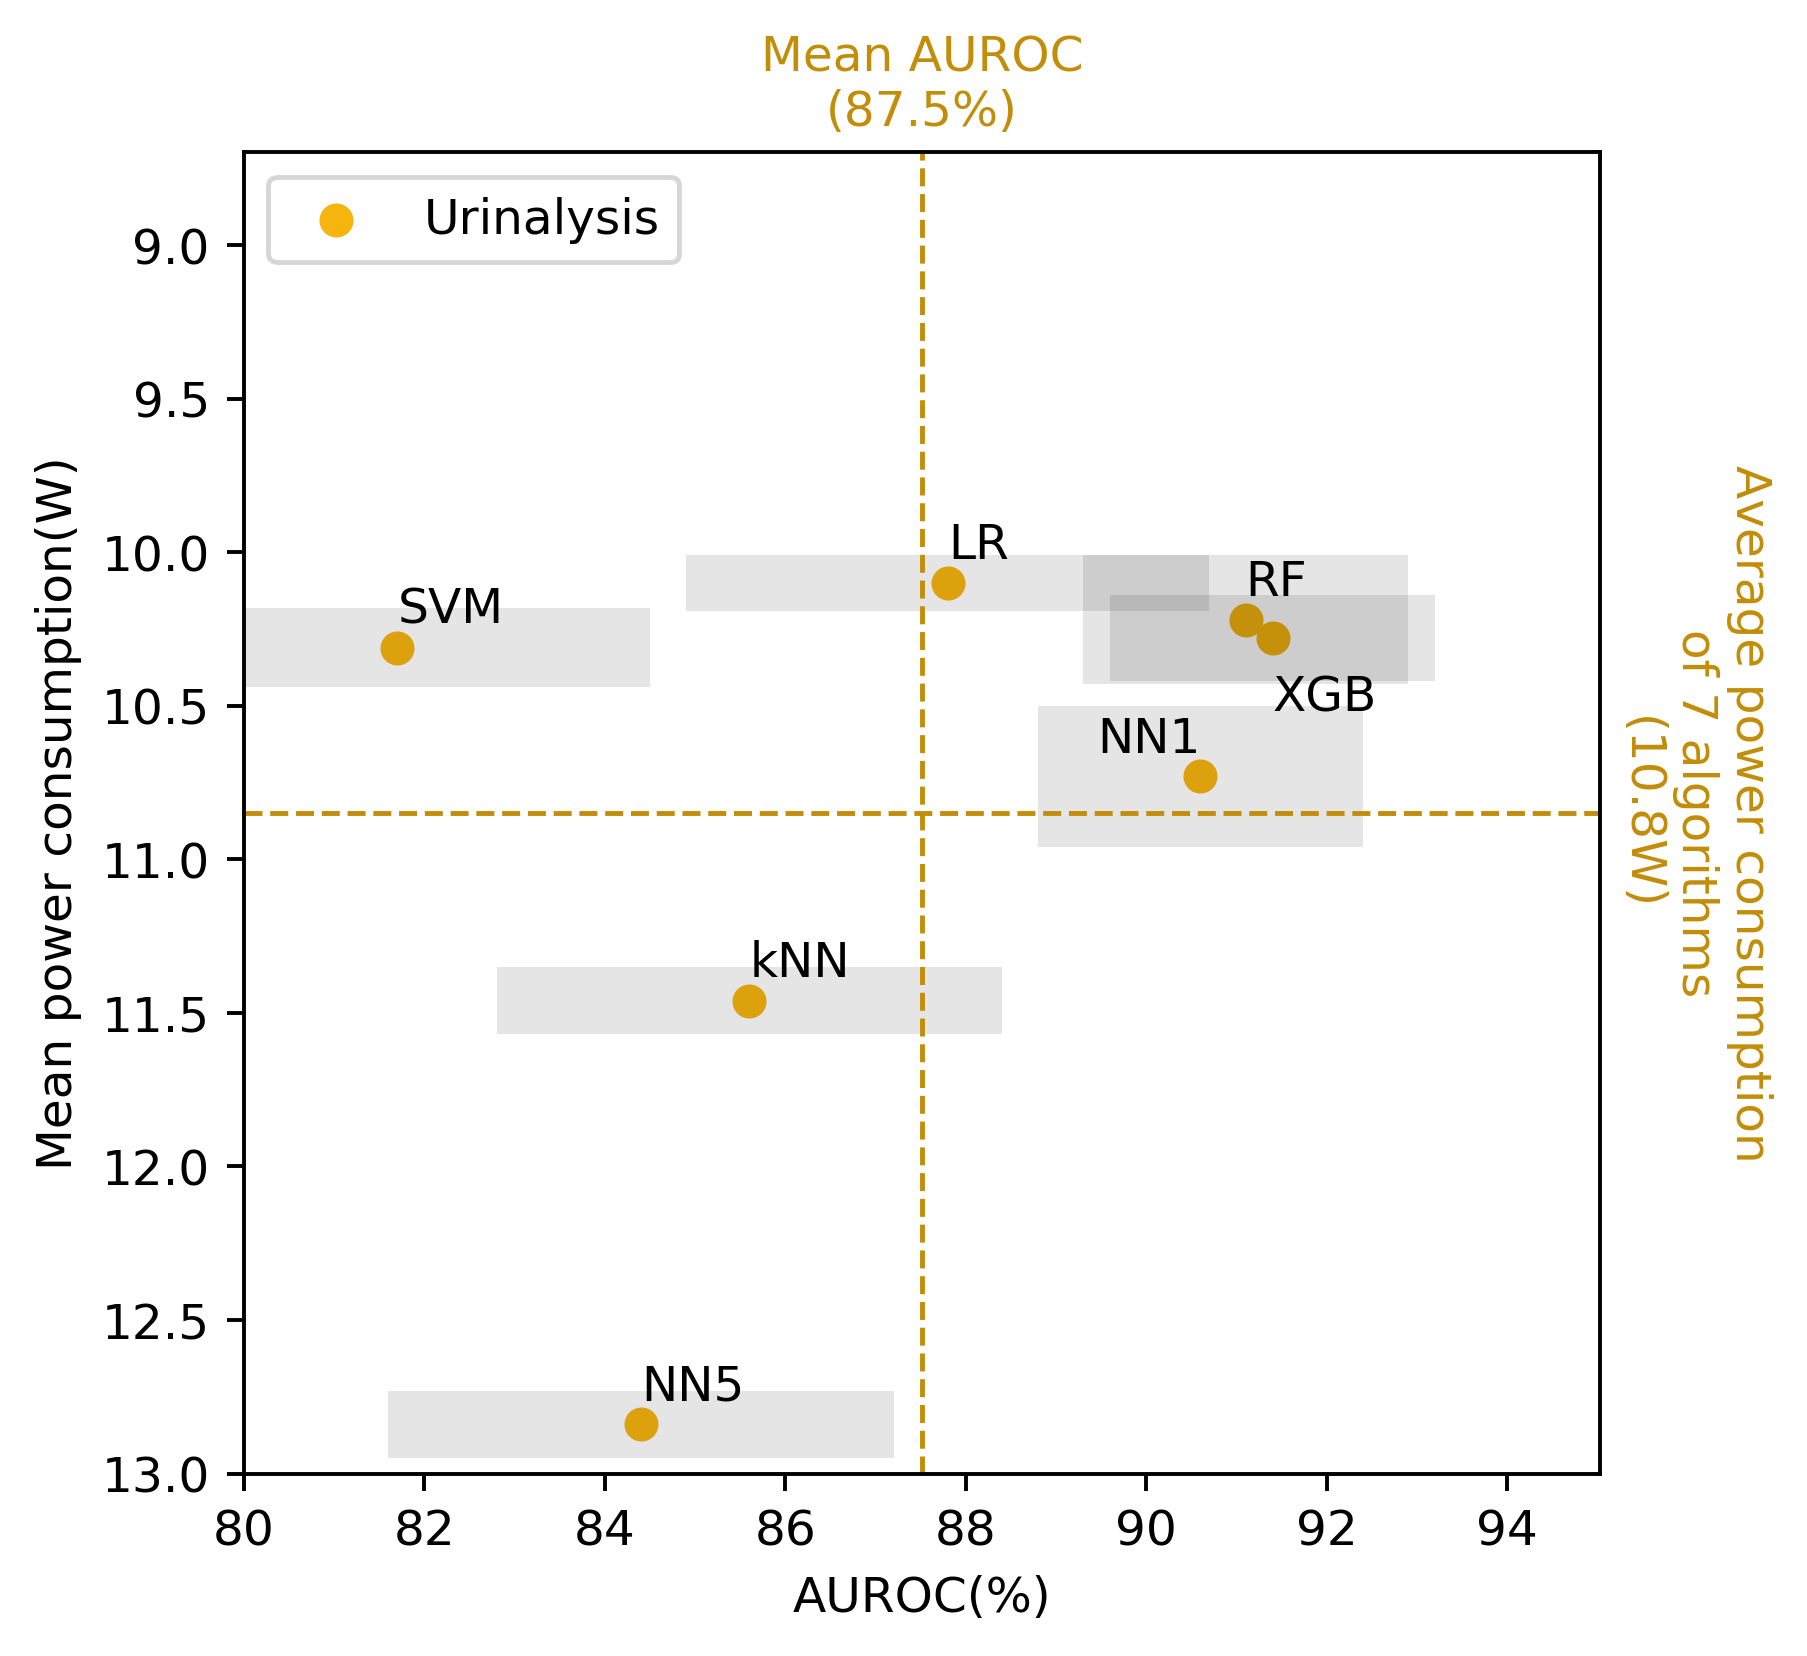

In [12]:
AUC_Tri =     [87.8, 85.6, 81.7, 91.1, 91.4, 90.6, 84.4]
AUC_Tri_low = [84.9, 82.8, 78.9, 89.3, 89.6, 88.8, 81.6]
power_Tri =     [10.10, 11.46, 10.31, 10.22, 10.28, 10.73, 12.84]
power_Tri_low = [10.01, 11.35, 10.18, 10.01, 10.14, 10.50, 12.73]
position_Tri =  [(0,5),(0,5),(0,5),(0,5),(0,-15),(0,5),(0,5)]
alignment_Tri = ['left','left','left','left','left','right','left',]

# x_limit: 2.0*AUC
# y_limit: upper limit 13
figure_5(AUC_Tri,
         power_Tri,
         AUC_Tri_low,
         power_Tri_low,
         color = arg_yellow,
         position = position_Tri,
         alignment = alignment_Tri,
         label = 'Urinalysis',
         color_dash = (194/255,141/255,8/255),
         filename = 'figure5b.png')